In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

### Lendo a base de dados


In [175]:
dados = pd.read_excel('CCARDBALANCE.xlsx')
dados = dados.drop('ID',axis = 1)
display(dados)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


### Corrigindo os valores de string para numeric

In [176]:
dados['Estudante'] = dados['Estudante'].replace({'Yes': 1, 'No': 0})
dados['Casado'] = dados['Casado'].replace({'Yes': 1, 'No': 0})
dados['Etnia'] = dados['Etnia'].replace({'Caucasian': 0, 'Asian': 1,'African American' : 2})
dados['Sexo'] = dados['Sexo'].replace({' Male':1,'Female':0})

In [177]:
display(dados)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,14.891,3606,283,2,34,11,1,0,1,0,333
1,106.025,6645,483,3,82,15,0,1,1,1,903
2,104.593,7075,514,4,71,11,1,0,0,1,580
3,148.924,9504,681,3,36,11,0,0,0,1,964
4,55.882,4897,357,2,68,16,1,0,1,0,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,0,560
396,13.364,3838,296,5,65,17,1,0,0,2,480
397,57.872,4171,321,5,67,12,0,0,1,0,138
398,37.728,2525,192,1,44,13,1,0,1,0,0


### DataFrame para Classificação

In [178]:
dados_classificacao = pd.read_excel('CCARDBALANCE.xlsx')
dados_classificacao = dados_classificacao.drop('ID',axis = 1)
dados_classificacao.loc[dados['Gasto Mensal'] > 0, 'Gasto Mensal'] = 'gastou'
dados_classificacao.loc[dados['Gasto Mensal'] == 0, 'Gasto Mensal'] = 'não gastou'
dados_classificacao['Estudante'] = dados['Estudante'].replace({'Yes': 1, 'No': 0})
dados_classificacao['Casado'] = dados['Casado'].replace({'Yes': 1, 'No': 0})
dados_classificacao['Etnia'] = dados['Etnia'].replace({'Caucasian': 0, 'Asian': 1,'African American' : 2})
dados_classificacao['Sexo'] = dados['Sexo'].replace({' Male':1,'Female':0})
display(dados_classificacao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,14.891,3606,283,2,34,11,1,0,1,0,gastou
1,106.025,6645,483,3,82,15,0,1,1,1,gastou
2,104.593,7075,514,4,71,11,1,0,0,1,gastou
3,148.924,9504,681,3,36,11,0,0,0,1,gastou
4,55.882,4897,357,2,68,16,1,0,1,0,gastou
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,0,gastou
396,13.364,3838,296,5,65,17,1,0,0,2,gastou
397,57.872,4171,321,5,67,12,0,0,1,0,gastou
398,37.728,2525,192,1,44,13,1,0,1,0,não gastou


### Classificação

In [179]:
X = dados_classificacao.drop('Gasto Mensal', axis = 1)
y = dados_classificacao['Gasto Mensal']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
modelo = DecisionTreeClassifier(criterion = 'gini',max_depth= 5)
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

In [180]:
X.columns

Index(['Renda', 'Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo',
       'Estudante', 'Casado', 'Etnia'],
      dtype='object')

In [181]:
f_names = X.columns
c_name = y

### Árvore de Classificação

Número de Folhas:  12
Profundidade:  5


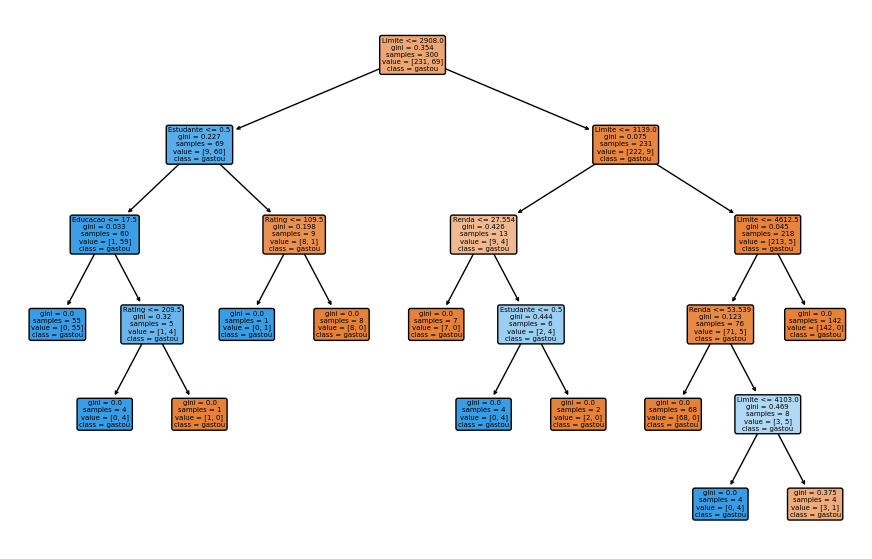

In [182]:
#Numero de folhas
print("Número de Folhas: ", modelo.get_n_leaves())

#Profundidade
print("Profundidade: ",modelo.get_depth())
plt.figure( figsize=(11,7),dpi=100)
plot_tree(modelo,feature_names= f_names, class_names= c_name,filled=True, rounded=True,fontsize=5.0)
plt.show()

### Estatísticas de importância para o modelo

In [183]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia Treino: ", modelo.score(X_train, y_train))
print("Acurácia Teste: ", modelo.score(X_test, y_test))


Renda 0.08079324298351245
Limite 0.7443419175767191
Rating 0.0322430104789784
Cartoes 0.0
Idade 0.0
Educacao 0.003500063637520696
Sexo 0.0
Estudante 0.13912176532326936
Casado 0.0
Etnia 0.0
Acurácia Treino:  0.9966666666666667
Acurácia Teste:  0.96


In [184]:
teste = {'Renda': 60000 ,'Limite':4200,'Rating':650,'Cartoes':2
         ,'Idade':20,'Educacao':10,'Sexo':1,'Estudante':1,'Casado':0,'Etnia':1}
teste_df = pd.DataFrame(data = teste, index=[0])
display(teste_df)
previsao = modelo.predict(teste_df)
print(previsao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia
0,60000,4200,650,2,20,10,1,1,0,1


['gastou']


### Regressão

In [185]:
X = dados.drop('Gasto Mensal', axis = 1)
y = dados['Gasto Mensal']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
modelo = DecisionTreeRegressor(criterion = 'squared_error',max_depth= 4)
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

### Margem de erro

In [186]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 178.86935608809264


Número de Folhas:  16
Profundidade:  4


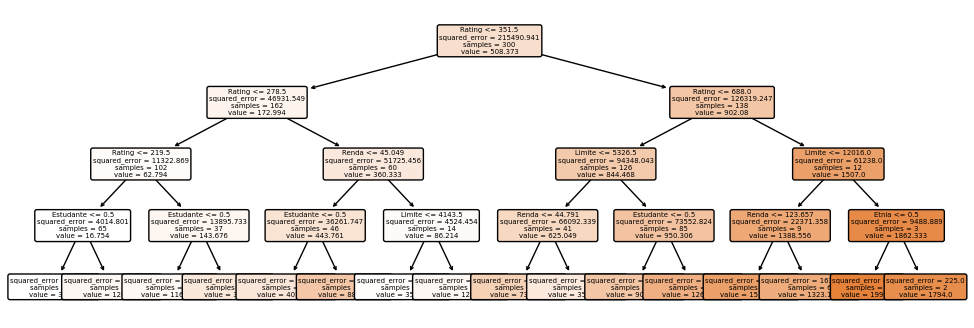

In [187]:
#Numero de folhas
print("Número de Folhas: ", modelo.get_n_leaves())

#Profundidade
print("Profundidade: ",modelo.get_depth())
plt.figure( figsize=(12,4),dpi=100)
plot_tree(modelo,feature_names= f_names, class_names= c_name,filled=True, rounded=True,fontsize=5.0)
plt.show()

# Teste

In [188]:
teste = {'Renda': 60000 ,'Limite':4200,'Rating':650,'Cartoes':2
         ,'Idade':20,'Educacao':10,'Sexo':1,'Estudante':1,'Casado':0,'Etnia':1}
teste_df = pd.DataFrame(data = teste, index=[0])
display(teste_df)
previsao = modelo.predict(teste_df)
print(previsao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia
0,60000,4200,650,2,20,10,1,1,0,1


[352.33333333]


### Quão importante é cada característica para o quanto de gasto mensal a pessoa vai ter.

In [189]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia Treino: ", modelo.score(X_train, y_train))
print("Acurácia Teste: ", modelo.score(X_test, y_test))

Renda 0.047732700422669506
Limite 0.06088666888266007
Rating 0.8477403408862515
Cartoes 0.0
Idade 0.0
Educacao 0.0
Sexo 0.0
Estudante 0.04314698013570441
Casado 0.0
Etnia 0.0004933096727144864
Acurácia Treino:  0.8785096985525083
Acurácia Teste:  0.8361789365593075


### Utilizando RandomForest

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
modelo = RandomForestRegressor()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

In [191]:
teste = {'Renda': 60000 ,'Limite':4200,'Rating':650,'Cartoes':2
         ,'Idade':20,'Educacao':10,'Sexo':1,'Estudante':1,'Casado':0,'Etnia':1}
teste_df = pd.DataFrame(data = teste, index=[0])
display(teste_df)
previsao = modelo.predict(teste_df)
print(previsao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia
0,60000,4200,650,2,20,10,1,1,0,1


[831.52]


### Margem de erro

In [192]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 88.00094698354103


### Features do RandomForest são mais aprimoradas e a acurácia esta bem mais alta.

In [193]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia Treino: ", modelo.score(X_train, y_train))
print("Acurácia Teste: ", modelo.score(X_test, y_test))

Renda 0.08190353498735194
Limite 0.2883330728600055
Rating 0.5533156465973719
Cartoes 0.003067669589075023
Idade 0.006919991824275885
Educacao 0.004871606138530773
Sexo 0.0009025134113362476
Estudante 0.05732559522743904
Casado 0.0016583848441626178
Etnia 0.0017019845204512198
Acurácia Treino:  0.9926678630938988
Acurácia Teste:  0.9603473200263346
